In [1]:
import json
import pandas as pd
import numpy as np

In [8]:
with open("intrinsic_fewshot_hardness/heatmap_raw_data.json","r",encoding="utf-8") as f:
    raw_data = json.load(f)
    
output_collection = raw_data["output_collection"]
majority_collection = raw_data["majority_collection"]
testsize_collection = raw_data["testsize_collection"]
all_dist_collections = raw_data["all_dist_collections"]
output_collection_electra = raw_data["output_collection_electra"]

In [61]:
# drop these as they are not 'accuracy of one model after finetuning'
# which is what we need
fine_tuned_acc = pd.DataFrame(output_collection) \
    .drop(["sensitivity", "rda", "few-avg"], axis="columns") / 100.0

baseline_acc = pd.DataFrame(
    { "baseline": list(majority_collection.values()) }
    , index=list(majority_collection.keys()) )

# make sure all values are on a scale of [0.0, 1.0]
baseline_acc_scaled = baseline_acc.where(baseline_acc <= 1.0, baseline_acc / 100)
all_acc = pd.concat([fine_tuned_acc, baseline_acc_scaled], axis="columns")

# I'm not sure what to do with tasks that contain NaN values. They seem in
# appropriate to include since we cannot compare all of them with one another.
clean_acc = all_acc.dropna()

display(all_acc)


,manual,lmbff,nullp,bitfit,adapet,ptuning,adapter,compacter,roberta,roberta-zero,baseline
anaphora,0.5030,0.5030,0.4790,0.4930,0.542,0.5210,0.5820,0.5070,0.500,0.493,0.51000
boolean,0.9830,0.6970,0.7170,0.7420,0.820,0.8060,0.9360,0.7220,0.726,0.629,0.73000
comparative,0.5240,0.4850,0.4590,0.4700,0.867,0.6480,0.5730,0.5630,0.648,0.648,0.65000
conditional,0.6210,0.9770,0.7170,0.6800,1.000,0.6620,1.0000,0.6620,0.662,0.662,0.66000
counting,0.8500,0.8520,0.8190,0.8580,0.938,0.9050,0.8940,0.7960,0.662,0.338,0.66000
event,0.6250,0.6760,0.6170,0.6540,0.871,0.6130,0.6970,0.6060,0.500,0.507,0.50000
gender,0.5700,0.6130,0.5430,0.5220,0.805,0.5090,0.5090,0.5190,0.500,0.509,0.50000
lexico_syntactic,0.6530,0.6990,0.4890,0.5150,0.656,0.5170,0.5010,0.4880,0.513,0.512,0.51000
monotonicity,0.4830,0.7820,0.6110,0.5780,0.801,0.6940,0.6700,0.5560,0.671,0.329,0.67000
monotonicity_simple,0.5715,0.7250,0.6290,0.5900,0.566,0.6750,0.6660,0.6670,0.667,0.332,0.67000


In [63]:
def mfh(data) -> pd.DataFrame:
    return data.div(data["baseline"], axis="index").drop("baseline", axis="columns")

def mfh_avg(data) -> pd.DataFrame:
    mfh_data = mfh(data)
    molten = mfh_data.melt(
        id_vars=None, 
        value_vars=mfh_data.columns.to_list(), 
        var_name="method", 
        value_name="baseline_accuracy")
    return molten.groupby("method").mean()

all_mfh = mfh_avg(all_acc)
clean_mfh = mfh_avg(clean_acc)

display("Average 'Method-Specific' Few-Shot Hardness on all tasks:")
display(all_mfh)
display("Average 'Method-Specific' Few-Shot Hardness on 'clean' tasks:")
display(clean_mfh)

"Average 'Method-Specific' Few-Shot Hardness on all tasks:"

,baseline_accuracy
method,
adapet,1.342163
adapter,1.280592
bitfit,1.129623
compacter,1.032645
lmbff,1.364306
manual,1.224082
nullp,1.149002
ptuning,1.184893
roberta,1.007012


"Average 'Method-Specific' Few-Shot Hardness on 'clean' tasks:"

,baseline_accuracy
method,
adapet,1.363491
adapter,1.307752
bitfit,1.123960
compacter,1.050303
lmbff,1.394720
manual,1.224082
nullp,1.132974
ptuning,1.240978
roberta,1.007012


,baseline_accuracy
method,
ptuning,-0.056085
lmbff,-0.030413
adapter,-0.027160
adapet,-0.021329
compacter,-0.017658
manual,0.000000
roberta,0.000000
roberta-zero,0.000000
bitfit,0.005663


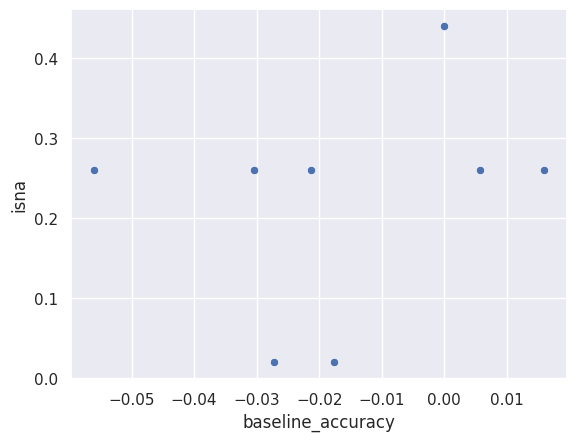

In [77]:
import seaborn as sns
sns.set_theme()

def isna_proportion(data: pd.DataFrame) -> pd.DataFrame:
    "returns the portion of NaN values in each column of the dataframe" 
    return pd.DataFrame({ "isna" : data.isnull().mean() }, index=data.columns.to_list())

diff_mfh = (all_mfh - clean_mfh).sort_values("baseline_accuracy")
diff_isna = pd.concat([diff_mfh, isna_proportion(all_acc)], axis="columns")

_ = sns.scatterplot(diff_isna, x="baseline_accuracy", y="isna")

In [ ]:
def heatmap_generation(aspects=["cola","sst2","mrpc","qqp","mnli","qnli","rte","boolq","cb","copa","wic"] \
                       , scope="clusters", mode = "corr"):

    method_cluster = {}
    method_cluster["prompt-fs"] = ["lmbff","nullp","bitfit","adapet"]
    method_cluster["lw-fs"] = ["ptuning","compacter"]
    method_cluster["fewshot"] = ["lmbff","nullp","bitfit","adapet","ptuning","compacter"]
    # method_cluster["fewshot-avg"] = ["few-avg"] 
#     method_cluster["lw-ft"] = ["p-tuning(f)","adapter(f)"]
#     method_cluster["lm-ft"] = ["roberta-b(f)","roberta-l(f)","bert-b(f)","bert-l(f)","t5-b(f)","t5-l(f)","t5-11b(f)"]
#     method_cluster["human"] = ["human"]



    included_tasks = ["cola","sst2","mrpc","qqp","mnli","qnli","rte","boolq","cb","copa","wic"]


    included_methods = []
    for k,v in method_cluster.items():
        for item in list(v):
            if item not in included_methods:      
                included_methods += [item]
    
    # included_tasks = aspects
    
    head = ["methods"]
    
    def generate_score(mode,lst1,lst2):
        if mode == "corr":
            return spearmanr(lst1, lst2)[0]
            # return pearsonr(lst1, lst2)[0]
        elif mode == "kendall_tau":
            return kendalltau(np.argsort(lst1), np.argsort(lst2))[0]
        elif mode == "weighted_tau":
            return weightedtau(np.argsort(lst1), np.argsort(lst2))[0]
        
    def cluster_score_avg(cluster1, cluster2, task_collector):
        all_score = 0
        for v1 in cluster1:
            for v2 in cluster2:
                all_score += task_collector[v1][v2]
                
        return all_score/(len(cluster1)*len(cluster2))
    
    def extract_score(method,task):
        temp_score = 0
        temp_collection = {}
        if method in output_collection.keys():
            temp_collection = output_collection
        else:
            temp_collection = output_dic
            
        if method in ["sensitivity","diversity"]:
            temp_score -= temp_collection[method][task]*100
        elif method in ["rda","coverage"]:
            # rda is computed as a sum over the examples
            temp_score -= temp_collection[method][task]
        else:
            temp_score += temp_collection[method][task]-majority_collection[task]
                    
        return temp_score

    # capture the correlation for each two tasks 
    df = pd.DataFrame()
    task_collector = {}
    
    if scope == "methods":
        for i,method in enumerate(included_methods):
            head.append(method)    
        df["methods"] = included_methods
    
    for method1 in included_methods:
        temp = []
        task_collector[method1] = {}
        
        for method2 in included_methods:
            lst1 = []
            lst2 = []

            for task in included_tasks:
                lst1.append(extract_score(method1,task))
                lst2.append(extract_score(method2,task))

            temp_score = generate_score(mode,lst1,lst2)
            temp.append(round(temp_score,4))
            task_collector[method1][method2] = temp_score 
            
        if scope == "methods":
            df[method1] = temp
            
            
    if scope == "methods":
        df.set_index('methods', drop=True, inplace=True)
    
        
    if scope == "clusters":
            for key in list(method_cluster.keys()):
                head.append(key)
                
            df["clusters"] = list(method_cluster.keys())
            
            for cluster1 in df["clusters"]:
                temp = []
                for cluster2 in df["clusters"]:
                    temp_score = cluster_score_avg(method_cluster[cluster1], method_cluster[cluster2], task_collector)
                    temp.append(round(temp_score,4))
            
                df[cluster1] = temp

            df.set_index('clusters', drop=True, inplace=True)
        
    mask = np.triu(np.ones_like(df, dtype=bool))
    f, ax = plt.subplots(figsize=(9.5, 9))

    mask[0][0] = False
    mask[1][1] = False
    mask[2][2] = False
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    
    if scope == "clusters":
        sns.heatmap(df,annot=True,mask=mask, cmap='gist_gray_r', vmax=1, center=0.78,cbar=False,
                    square=False, linewidths=.6, cbar_kws={"shrink": .5}, annot_kws={"fontsize":50})
        
        ax.set(ylabel=None)
        ax.tick_params(axis='x', labelsize= 30)
        ax.tick_params(axis='y', labelsize= 30)
    
    
    if scope == "methods":
        
        mask[3][3] = False
        mask[4][4] = False
        mask[5][5] = False
        sns.heatmap(df,annot=True,mask=mask, cmap='gist_gray_r', vmax=1, center=0.6,cbar=False,
            square=False, linewidths=.6, cbar_kws={"shrink": .5}, annot_kws={"fontsize":30})
        
        ax.set(ylabel=None)
        ax.tick_params(axis='x', labelsize= 15)
        ax.tick_params(axis='y', labelsize= 15)

    
    # image_format = 'svg' # e.g .png, .svg, etc.
    # image_name = 'glue_intrinsic_'+scope[:-1]+'.svg'
    # f.savefig(image_name, format=image_format, dpi=1200)
    
    image_name = 'glue_intrinsic_'+scope[:-1]+'.pdf'
    f.savefig(image_name, format="pdf", bbox_inches="tight", dpi=1200)

    plt.show()
    
heatmap_generation(scope="methods")
heatmap_generation(scope="clusters")